Name:- Rohit Chandrakant Ahire <br>
Matriculation number:- 7069699 <br>


Name:- Saket Sai Padala<br>
Matriculation number:- 7069310

In [3]:
%pip install scikit-learn
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 30.8 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Welcome to the second part of Assignment 1. Please remember that there is another Notebook together with this :) 

In this Notebook we will start by downloading a small digits dataset and visualizing some samples. Afterwards, we will learn how to split our data to train-validation-test splits in order to train a linear classifier. Don't worry, we will use existing library for training the classifier. Our focus is mainly on splitting the data and being able to process the output of a classifier. 

You will learn how to convert raw outputs to predictions and probability distributions. We will also do a very small hyper-parameter tuning over our validation set. 

In [4]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

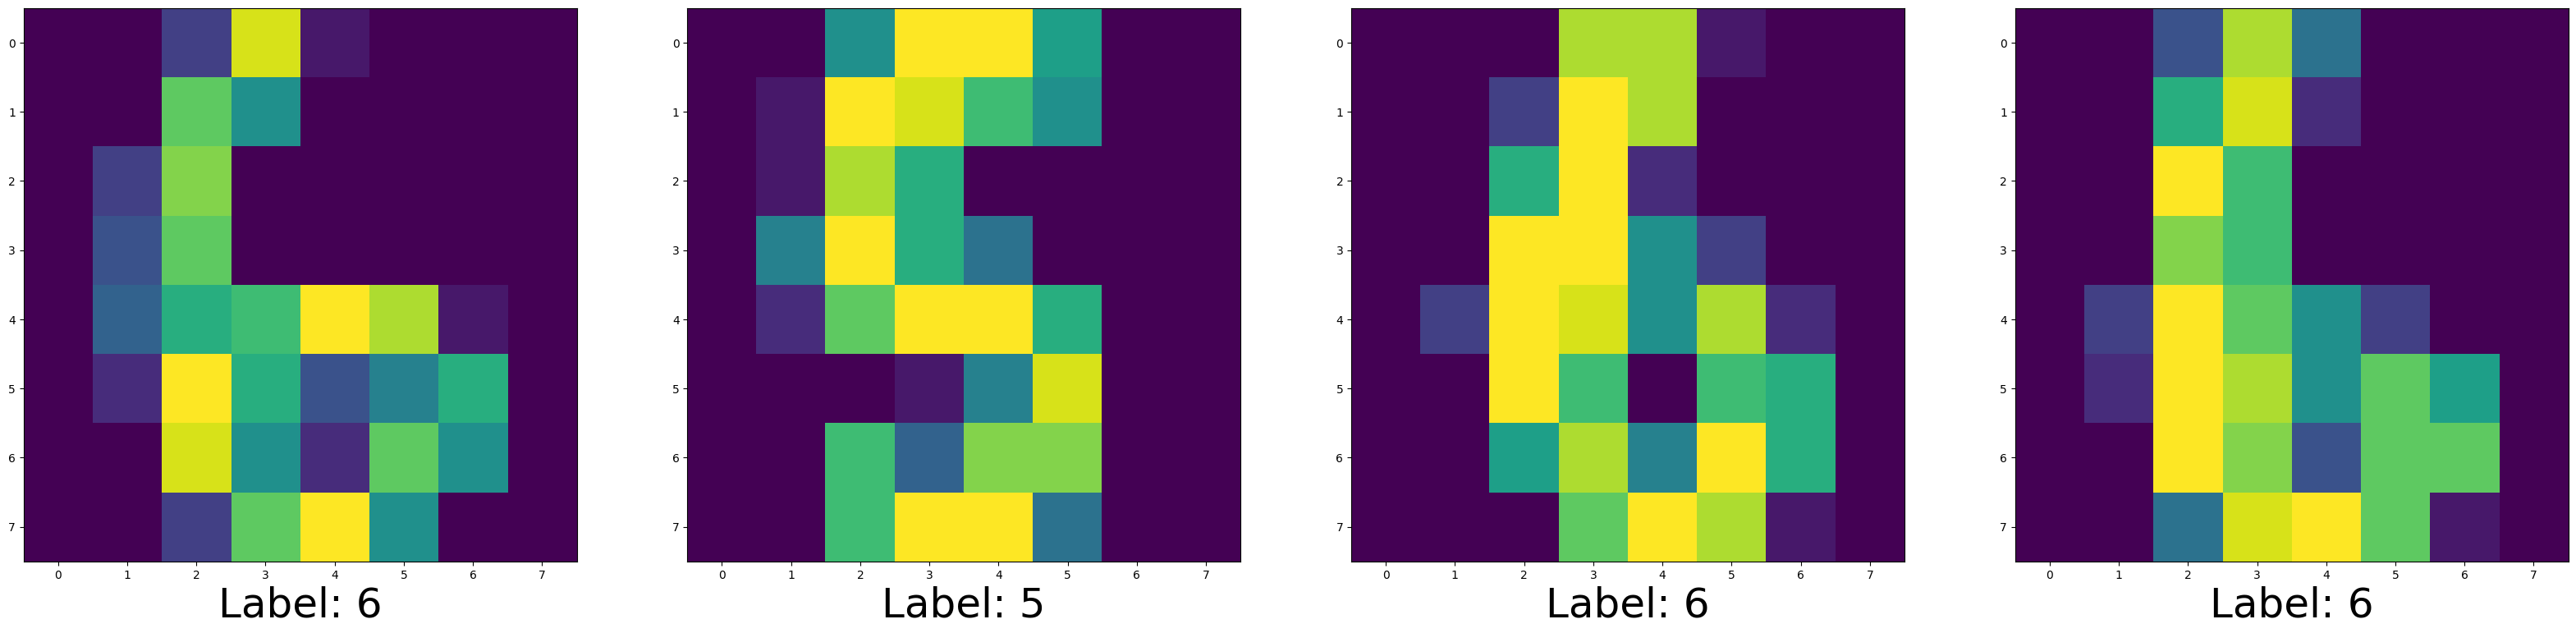

In [5]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [ ]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
	# You `cannot` use train_test_split function provided by some library.
	# You are however welcome to look into their source code to see how one does this if it helps.
    if len(data) != len(target):
        raise ValueError("Data and target must have the same length")
    if not 0 < fraction < 1:
        raise ValueError("Fraction must be between 0 and 1")
    
    n_samples = len(data)
    indices = list(range(n_samples))
    random.shuffle(indices)
    n_train = int(fraction * n_samples)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]
    data_train = data[train_indices]
    target_train = target[train_indices]
    data_test = data[test_indices]
    target_test = target[test_indices]
    
    return data_train, target_train, data_test, target_test

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split(data, digits.target, fraction=0.5)
        # TODO First separate the test samples!
        # Side-note: In a real benchmark people often use the same official test-set so that they can
        # compare their numbers to each other. In this assignment however we simply create our own
        # randomly selectd test set from the data.
    

# Now Split the TRAIN data into 80% train and 20% validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( X_trainval, y_trainval, fraction=0.8)
        # TODO Now separate the cross-validation samples!
    

In [9]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [26]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

Model output has shape (180, 10)


In [27]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    top1_acc = np.mean(predictions == targets) * 100
    return top1_acc # replace with accuracy
    ########################################

In [28]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 99.444


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set. Simply replace the written 0.1 value.


Please write down your tested values and results here. Which gamma value worked best on the val set?


## Results
Based on the output, the cross-validation accuracies for each gamma value on the validation set (`X_val`, `y_val`) are:

- **gamma = 0.1**: Cross-validation accuracy = 6.667%
- **gamma = 0.01**: Cross-validation accuracy = 59.444%
- **gamma = 0.001**: Cross-validation accuracy = 99.444%
- **gamma = 0.0001**: Cross-validation accuracy = 97.778%
- **gamma = 0.00001**: Cross-validation accuracy = 76.667%

## Analysis
**Best Gamma Value**: The highest cross-validation accuracy is **99.444%** achieved with **gamma = 0.001**. This indicates that `gamma = 0.001` is the best-performing hyperparameter among the tested values on the validation set.


In [29]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

In [30]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 98.665


In [ ]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores
    x_max = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - x_max)
    softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return softmax_x
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class

# Convert decision function output to softmax probabilities
softmax_output = softmax(output)

# Extract softmax probabilities for the predicted class
scores = softmax_output[np.arange(len(preds)), preds]
########################################

Visualize some of the test predictions!

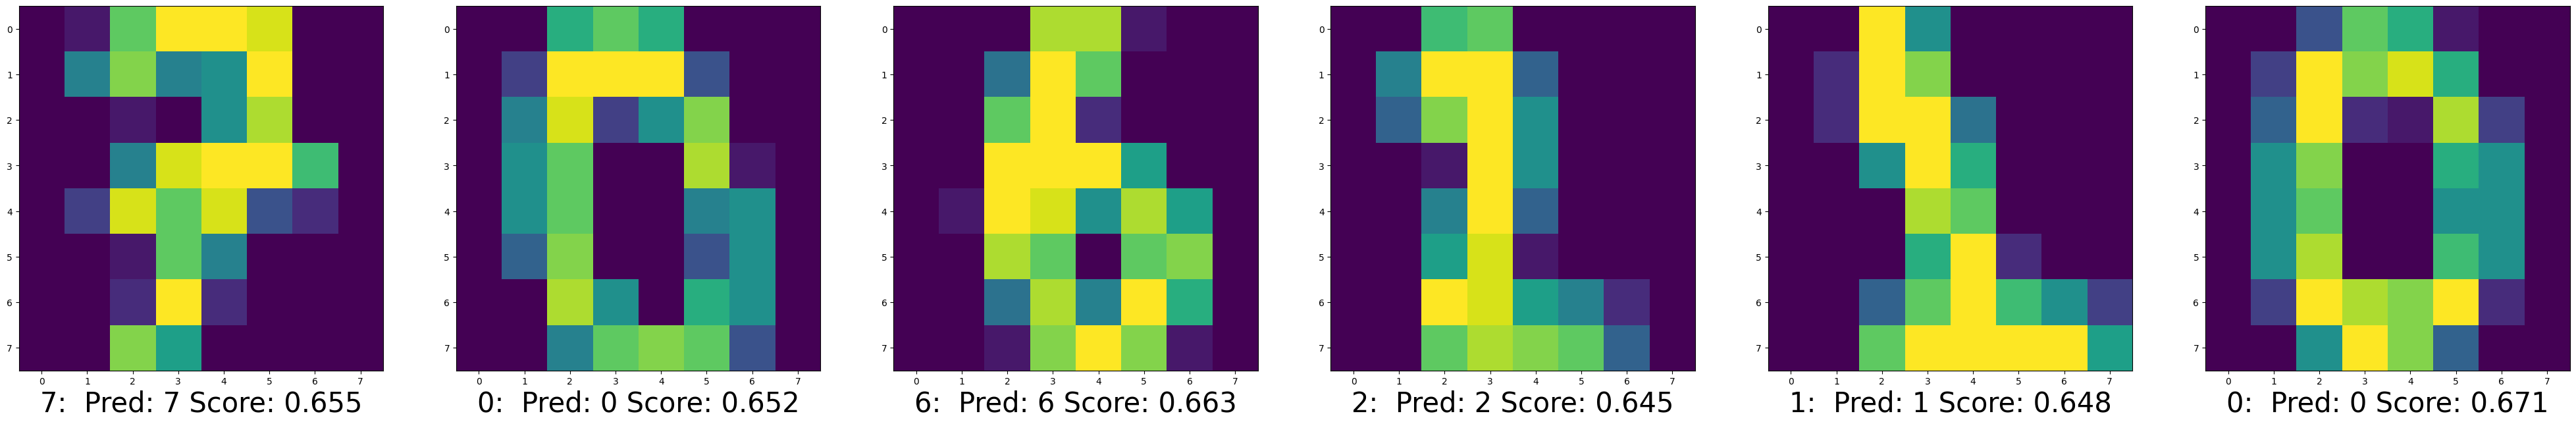

In [32]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    )

plt.show()